<a href="https://colab.research.google.com/github/rohandhunde/Time_Series_Forcasting_in_Tensorflow_BitPredict/blob/main/Time_series_forecasting_in_tensorflow_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Check for GPU
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [6]:
import pandas as pd

url = 'https://drive.google.com/file/d/1Dz0wHTE7q3f8tJ_GbYSjwVuH6_vXG8Xy/view?usp=sharing'

# Extract the file ID from the link
file_id = url.split('/')[-2]

# Generate a download link for the file
download_link = 'https://drive.google.com/uc?id=' + file_id

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(download_link, encoding='latin', parse_dates=['Date'])
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [7]:
# we have to download the raw data from the GitHub
!wget https://drive.google.com/file/d/1Dz0wHTE7q3f8tJ_GbYSjwVuH6_vXG8Xy/view?usp=sharing

--2023-07-11 07:25:17--  https://drive.google.com/file/d/1Dz0wHTE7q3f8tJ_GbYSjwVuH6_vXG8Xy/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.253.63.102, 172.253.63.101, 172.253.63.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing.1’

view?usp=sharing.1      [ <=>                ]  78.62K  --.-KB/s    in 0.001s  

2023-07-11 07:25:18 (82.3 MB/s) - ‘view?usp=sharing.1’ saved [80511]



In [8]:
# Import with pandas
# not use thise when above 2 is not exicuted
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [9]:
# import matplotlib.pyplot as plt

# # Assuming `df` is your DataFrame containing the Bitcoin price data

# # Extract the year from the Date column
# df['Year'] = df['Date'].dt.year

# # Group the data by year and calculate the average closing price
# average_prices = df.groupby('Year')['Closing Price (USD)'].mean()

# # Plot the data
# plt.plot(average_prices.index, average_prices.values)
# plt.xlabel('Year')
# plt.ylabel('Average Closing Price (USD)')
# plt.title('Bitcoin Average Closing Price by Year')
# plt.grid(True)

# # Display the plot
# plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [11]:
len(df)

2787

In [12]:
df.shape

(2787, 5)

In [13]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


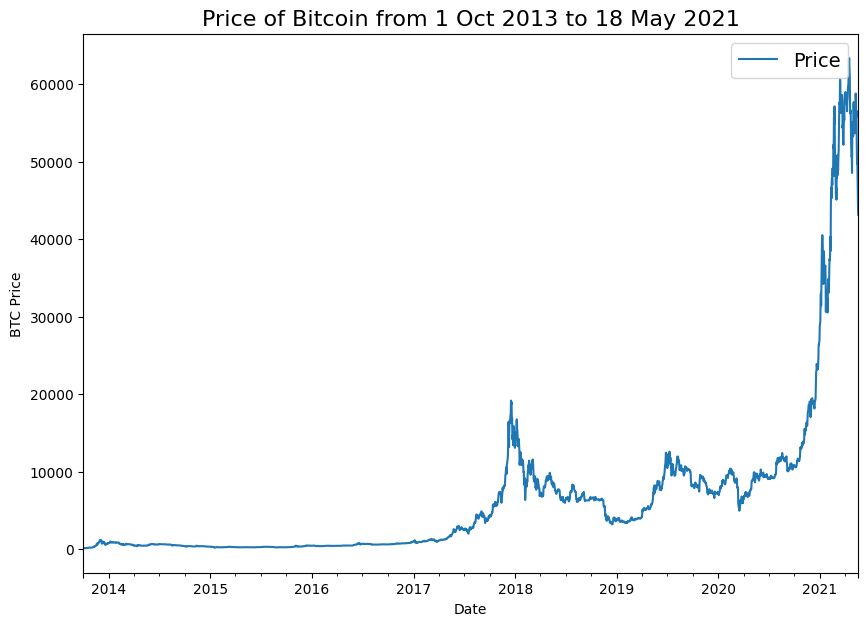

In [14]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

TODO: Formate data


*   Turn data into a windowed dataset
*   Training/test sets for time series
*   Univariate - Bitcoins price history
*   Multivariate - Bitcoins price history + block size


In [15]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [16]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%m/%d/%Y"))
        btc_price.append(float(line[2]))

# View first 10 of each
print(timesteps[:10])
print(btc_price[:10])


[datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2013, 10, 2, 0, 0), datetime.datetime(2013, 10, 3, 0, 0), datetime.datetime(2013, 10, 4, 0, 0), datetime.datetime(2013, 10, 5, 0, 0), datetime.datetime(2013, 10, 6, 0, 0), datetime.datetime(2013, 10, 7, 0, 0), datetime.datetime(2013, 10, 8, 0, 0), datetime.datetime(2013, 10, 9, 0, 0), datetime.datetime(2013, 10, 10, 0, 0)]
[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116]


# Create the Data Formate: Creating the train and test set for time series data

we are splitting the data set in normal manner may be its right may be its wrong we can conclude that with visualization

In [17]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [18]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

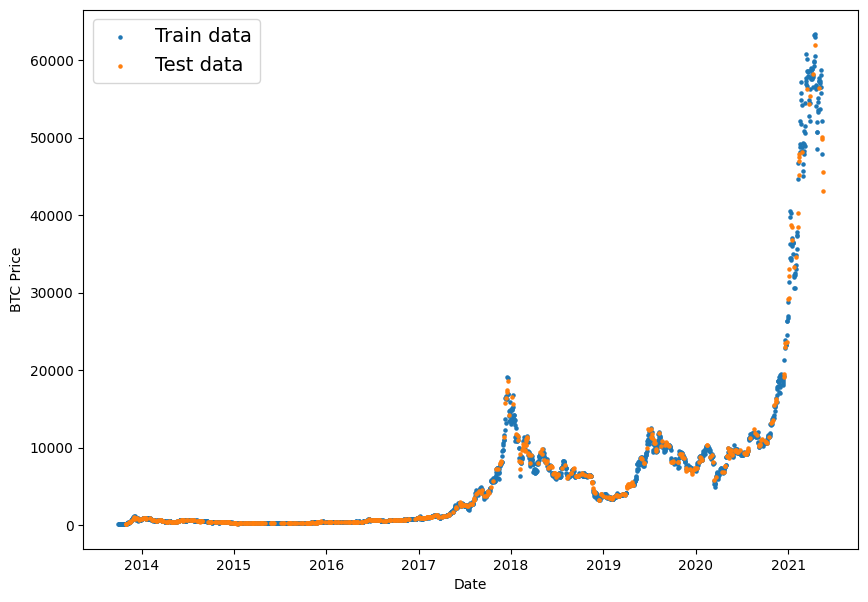

In [19]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Splitting the dataset in right way

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [21]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

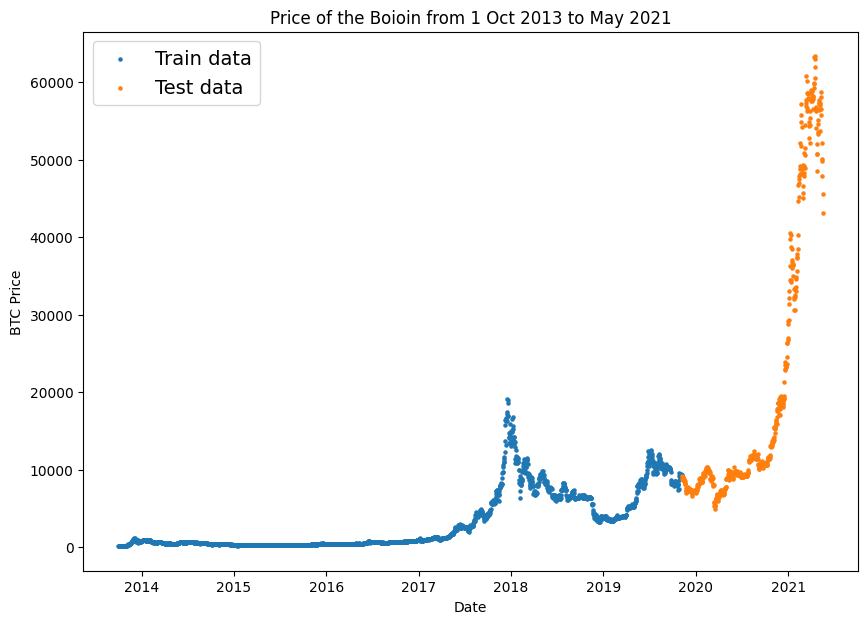

In [22]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.title("Price of the Boioin from 1 Oct 2013 to May 2021")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

TODO: Model Data
* Baseline - naive forecasting
* Baseline2 - moving average
* Baseline3 - fully connected
* Sequence models
* LSTM
* N-Beats algorithm -
N-BEATS (Neural basis expansion analysis for interpretable time series forecasting) is a deep learning model architecture designed for time series forecasting tasks.

In [23]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

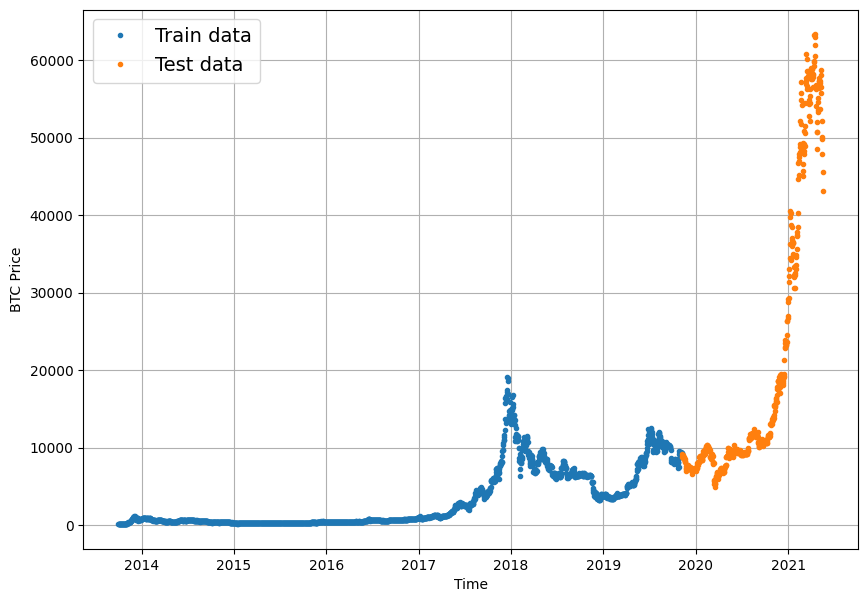

In [24]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [25]:
timesteps[:10]

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
       '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
       '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
       '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [26]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

# Model: Naive forecast(baseline)

In [27]:
# Create a naïve forecast
# the naive bayes is actually is a y_test as you see below
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.485821, 8794.358645, 8798.042055, 9081.186878, 8711.534339,
        8760.892718, 8749.520591, 8656.970922, 8500.643558, 8469.260899]),
 array([57107.12067, 58788.20968, 58102.19143, 55715.54665, 56573.55547,
        52147.82119, 49764.13208, 50032.69314, 47885.62525, 45604.61575]))

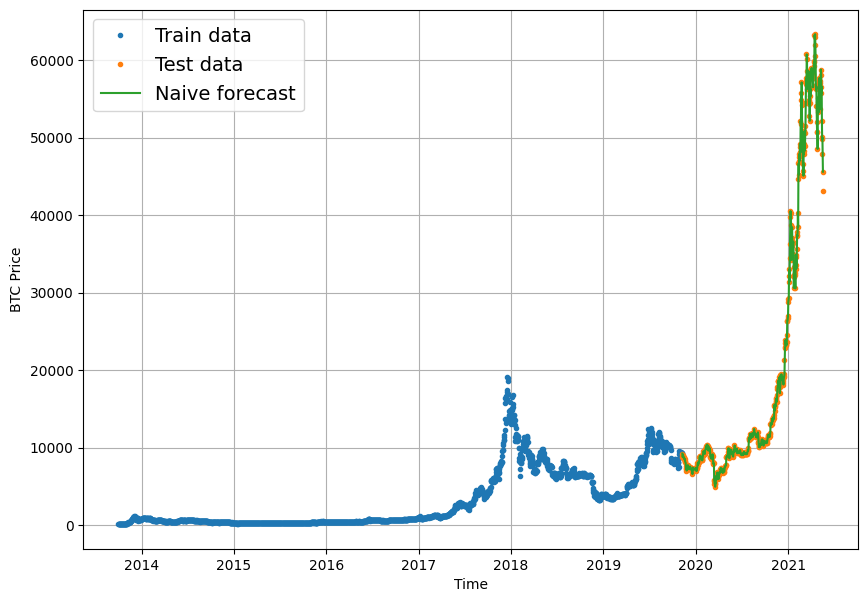

In [28]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

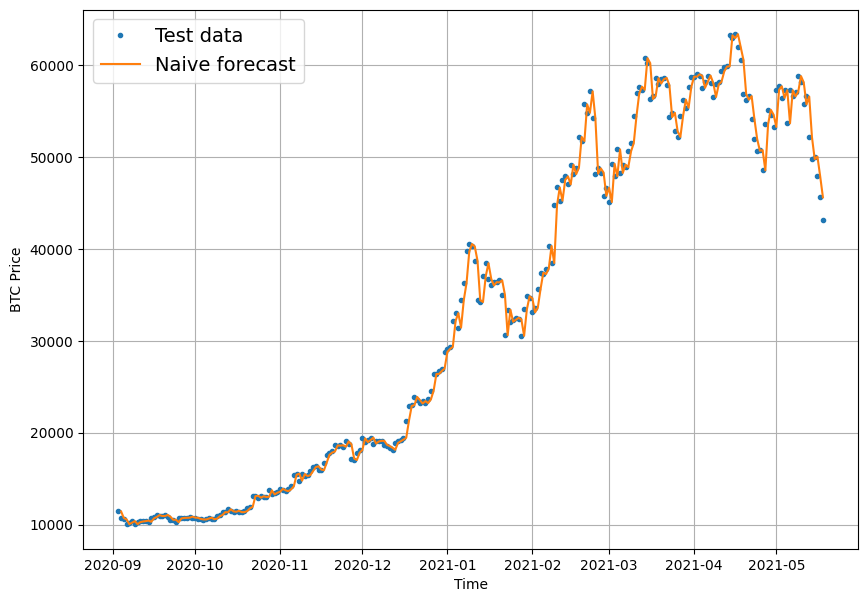

In [29]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [30]:
# Let's get TensorFlow!
import tensorflow as tf

In [31]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [32]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [33]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [34]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.63296362365

In [35]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [36]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [37]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [38]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [39]:
import numpy as np
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [40]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [41]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20968 58102.19143 55715.54665 56573.55547 52147.82119 49764.13208
 50032.69314] -> Label: [47885.62525]
Window: [58102.19143 55715.54665 56573.55547 52147.82119 49764.13208 50032.69314
 47885.62525] -> Label: [45604.61575]
Window: [55715.54665 56573.55547 52147.82119 49764.13208 50032.69314 47885.62525
 45604.61575] -> Label: [43144.47129]


In [42]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [43]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [44]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [45]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [46]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [47]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
 1/18 [>.............................] - ETA: 10s - loss: 4186.9492 - mae: 4186.9492

18/18 [==============================] - 1s 42ms/step - loss: 2109.1738 - mae: 2109.1738 - val_loss: 1620.6484 - val_mae: 1620.6484
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 386.4586 - mae: 386.4586 - val_loss: 1864.4155 - val_mae: 1864.4155
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 242.6744 - mae: 242.6744

18/18 [==============================] - 0s 25ms/step - loss: 258.3548 - mae: 258.3548 - val_loss: 1181.3167 - val_mae: 1181.3167
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 270.9735 - mae: 270.9735

18/18 [==============================] - 0s 26ms/step - loss: 215.5609 - mae: 215.5609 - val_loss: 1152.5203 - val_mae: 1152.5203
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 226.0025 - mae: 226.0025

18/18 [==============================] - 0s 24ms/step - loss: 205.1776 - mae: 205.1776 - val_loss: 1137.6210 - val_mae: 1137.6210
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 157.0922 - mae: 157.0922

18/18 [==============================] - 0s 26ms/step - loss: 198.7786 - mae: 198.7786 - val_loss: 1081.3010 - val_mae: 1081.3010
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 247.6011 - mae: 247.6011

18/18 [==============================] - 0s 25ms/step - loss: 188.1386 - mae: 188.1386 - val_loss: 1036.7815 - val_mae: 1036.7815
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 163.6468 - mae: 163.6468

18/18 [==============================] - 0s 25ms/step - loss: 180.4932 - mae: 180.4932 - val_loss: 994.2938 - val_mae: 994.2938
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 177.3563 - mae: 177.3563 - val_loss: 1020.2469 - val_mae: 1020.2469
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 192.2593 - mae: 192.2593

18/18 [==============================] - 0s 26ms/step - loss: 172.0925 - mae: 172.0925 - val_loss: 948.4891 - val_mae: 948.4891
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 181.8716 - mae: 181.8716

18/18 [==============================] - 1s 38ms/step - loss: 167.0900 - mae: 167.0900 - val_loss: 915.9337 - val_mae: 915.9337
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 162.2213 - mae: 162.2213 - val_loss: 981.9626 - val_mae: 981.9626
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 160.6697 - mae: 160.6697 - val_loss: 927.9195 - val_mae: 927.9195
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 173.8364 - mae: 173.8364

18/18 [==============================] - 0s 26ms/step - loss: 156.8828 - mae: 156.8828 - val_loss: 874.8220 - val_mae: 874.8220
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 159.1510 - mae: 159.1510

18/18 [==============================] - 0s 26ms/step - loss: 152.0938 - mae: 152.0938 - val_loss: 844.2715 - val_mae: 844.2715
Epoch 16/100
18/18 [==============================] - 0s 3ms/step - loss: 147.6425 - mae: 147.6425 - val_loss: 852.4316 - val_mae: 852.4316
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 141.0404 - mae: 141.0404

18/18 [==============================] - 0s 23ms/step - loss: 145.7760 - mae: 145.7760 - val_loss: 836.4062 - val_mae: 836.4062
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 158.9580 - mae: 158.9580

18/18 [==============================] - 0s 23ms/step - loss: 144.8193 - mae: 144.8193 - val_loss: 821.7151 - val_mae: 821.7151
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 84.6372 - mae: 84.6372

18/18 [==============================] - 0s 24ms/step - loss: 139.9765 - mae: 139.9765 - val_loss: 789.0634 - val_mae: 789.0634
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 152.1788 - mae: 152.1788

18/18 [==============================] - 0s 25ms/step - loss: 138.2198 - mae: 138.2198 - val_loss: 756.7625 - val_mae: 756.7625
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 176.6858 - mae: 176.6858

18/18 [==============================] - 0s 24ms/step - loss: 140.0469 - mae: 140.0469 - val_loss: 739.0791 - val_mae: 739.0791
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 194.3703 - mae: 194.3703

18/18 [==============================] - 0s 23ms/step - loss: 134.8190 - mae: 134.8190 - val_loss: 732.6321 - val_mae: 732.6321
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 141.4465 - mae: 141.4465

18/18 [==============================] - 0s 26ms/step - loss: 133.3540 - mae: 133.3540 - val_loss: 718.6180 - val_mae: 718.6179
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 149.4919 - mae: 149.4919

18/18 [==============================] - 1s 33ms/step - loss: 131.7858 - mae: 131.7858 - val_loss: 712.4395 - val_mae: 712.4395
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 143.2844 - mae: 143.2844

18/18 [==============================] - 1s 30ms/step - loss: 130.2097 - mae: 130.2097 - val_loss: 702.6942 - val_mae: 702.6942
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 133.1133 - mae: 133.1133

18/18 [==============================] - 1s 32ms/step - loss: 129.7056 - mae: 129.7056 - val_loss: 693.6204 - val_mae: 693.6204
Epoch 27/100
18/18 [==============================] - 0s 3ms/step - loss: 131.1615 - mae: 131.1615 - val_loss: 695.2177 - val_mae: 695.2177
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 125.5830 - mae: 125.5830

18/18 [==============================] - 0s 24ms/step - loss: 126.4280 - mae: 126.4280 - val_loss: 680.6222 - val_mae: 680.6222
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 124.1959 - mae: 124.1959 - val_loss: 707.4782 - val_mae: 707.4782
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 132.4466 - mae: 132.4466 - val_loss: 712.5175 - val_mae: 712.5175
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 135.7434 - mae: 135.7434 - val_loss: 781.1327 - val_mae: 781.1327
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6039 - mae: 133.6039

18/18 [==============================] - 0s 24ms/step - loss: 126.1609 - mae: 126.1609 - val_loss: 653.6047 - val_mae: 653.6047
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 151.4684 - mae: 151.4684

18/18 [==============================] - 1s 40ms/step - loss: 124.7889 - mae: 124.7889 - val_loss: 649.1135 - val_mae: 649.1135
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 129.6992 - mae: 129.6992

18/18 [==============================] - 0s 23ms/step - loss: 122.4034 - mae: 122.4034 - val_loss: 645.7677 - val_mae: 645.7677
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 105.8119 - mae: 105.8119

18/18 [==============================] - 0s 23ms/step - loss: 119.9898 - mae: 119.9898 - val_loss: 645.7289 - val_mae: 645.7289
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 125.8425 - mae: 125.8425 - val_loss: 659.9867 - val_mae: 659.9867
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 148.9305 - mae: 148.9305

18/18 [==============================] - 0s 24ms/step - loss: 122.6190 - mae: 122.6190 - val_loss: 640.0779 - val_mae: 640.0779
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 106.0310 - mae: 106.0310

18/18 [==============================] - 0s 24ms/step - loss: 119.9660 - mae: 119.9660 - val_loss: 632.5109 - val_mae: 632.5109
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 128.0685 - mae: 128.0685

18/18 [==============================] - 0s 26ms/step - loss: 118.0723 - mae: 118.0723 - val_loss: 629.7352 - val_mae: 629.7352
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 118.8156 - mae: 118.8156 - val_loss: 643.3945 - val_mae: 643.3945
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 122.4629 - mae: 122.4629 - val_loss: 668.4781 - val_mae: 668.4781
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 115.9987 - mae: 115.9987

18/18 [==============================] - 0s 24ms/step - loss: 124.5068 - mae: 124.5068 - val_loss: 621.5023 - val_mae: 621.5023
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 116.9864 - mae: 116.9864 - val_loss: 635.1420 - val_mae: 635.1420
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 72.2051 - mae: 72.2051

18/18 [==============================] - 0s 25ms/step - loss: 117.7748 - mae: 117.7748 - val_loss: 618.1428 - val_mae: 618.1428
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 82.5901 - mae: 82.5901

18/18 [==============================] - 0s 24ms/step - loss: 115.3879 - mae: 115.3879 - val_loss: 616.2023 - val_mae: 616.2023
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 116.9044 - mae: 116.9044 - val_loss: 641.3026 - val_mae: 641.3026
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 118.4237 - mae: 118.4237 - val_loss: 659.0634 - val_mae: 659.0634
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7198 - mae: 115.7198 - val_loss: 627.3276 - val_mae: 627.3276
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 117.6433 - mae: 117.6433 - val_loss: 684.0256 - val_mae: 684.0256
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 127.4959 - mae: 127.4959 - val_loss: 813.2726 - val_mae: 813.2726
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 123.7407 - mae: 123.7407 - val_loss: 735.4905 - val_mae: 735.4905
Epoch 52/100
18/18 [============

18/18 [==============================] - 0s 25ms/step - loss: 115.2114 - mae: 115.2114 - val_loss: 599.7989 - val_mae: 599.7989
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 114.3127 - mae: 114.3127 - val_loss: 819.1924 - val_mae: 819.1924
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 138.3119 - mae: 138.3119 - val_loss: 729.4214 - val_mae: 729.4214
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 125.4349 - mae: 125.4349 - val_loss: 654.1602 - val_mae: 654.1602
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 80.4178 - mae: 80.4178

18/18 [==============================] - 0s 25ms/step - loss: 115.4911 - mae: 115.4911 - val_loss: 591.6692 - val_mae: 591.6692
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 112.3556 - mae: 112.3556 - val_loss: 599.0259 - val_mae: 599.0259
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 111.8730 - mae: 111.8730 - val_loss: 593.6566 - val_mae: 593.6566
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5447 - mae: 111.5447 - val_loss: 613.8995 - val_mae: 613.8995
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6814 - mae: 112.6814 - val_loss: 633.9034 - val_mae: 633.9034
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 116.8398 - mae: 116.8398 - val_loss: 749.3004 - val_mae: 749.3004
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 154.8237 - mae: 154.8237

18/18 [==============================] - 0s 25ms/step - loss: 120.5066 - mae: 120.5066 - val_loss: 584.6313 - val_mae: 584.6313
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 114.3464 - mae: 114.3464 - val_loss: 590.1731 - val_mae: 590.1731
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 110.4287 - mae: 110.4287 - val_loss: 644.4999 - val_mae: 644.4999
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 118.5780 - mae: 118.5780 - val_loss: 748.2004 - val_mae: 748.2004
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 131.2247 - mae: 131.2247 - val_loss: 706.9827 - val_mae: 706.9827
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 123.9009 - mae: 123.9009 - val_loss: 585.5620 - val_mae: 585.5620
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7816 - mae: 114.7816 - val_loss: 601.4045 - val_mae: 601.4045
Epoch 72/100
18/18 [============

18/18 [==============================] - 0s 25ms/step - loss: 111.4073 - mae: 111.4073 - val_loss: 582.7418 - val_mae: 582.7418
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5817 - mae: 129.5817

18/18 [==============================] - 0s 24ms/step - loss: 109.8506 - mae: 109.8506 - val_loss: 580.5806 - val_mae: 580.5806
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 78.2839 - mae: 78.2839

18/18 [==============================] - 0s 24ms/step - loss: 111.7469 - mae: 111.7469 - val_loss: 576.9655 - val_mae: 576.9655
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 110.1457 - mae: 110.1457 - val_loss: 582.5978 - val_mae: 582.5978
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 113.3522 - mae: 113.3522 - val_loss: 581.4742 - val_mae: 581.4742
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 113.4040 - mae: 113.4040 - val_loss: 646.4354 - val_mae: 646.4354
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 119.0464 - mae: 119.0464

18/18 [==============================] - 1s 49ms/step - loss: 112.4921 - mae: 112.4921 - val_loss: 574.1750 - val_mae: 574.1750
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 108.3710 - mae: 108.3710 - val_loss: 599.8208 - val_mae: 599.8208
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3870 - mae: 116.3870 - val_loss: 584.1469 - val_mae: 584.1469
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 115.4629 - mae: 115.4629 - val_loss: 662.1943 - val_mae: 662.1943
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 119.8074 - mae: 119.8074 - val_loss: 574.8051 - val_mae: 574.8051
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5179 - mae: 109.5179 - val_loss: 587.0051 - val_mae: 587.0051
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 111.0252 - mae: 111.0252 - val_loss: 629.5394 - val_mae: 629.5394
Epoch 87/100
18/18 [============

18/18 [==============================] - 0s 23ms/step - loss: 110.5095 - mae: 110.5095 - val_loss: 571.0669 - val_mae: 571.0669
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 107.5917 - mae: 107.5917 - val_loss: 571.2807 - val_mae: 571.2807
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7698 - mae: 107.7698 - val_loss: 576.8893 - val_mae: 576.8893
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5464 - mae: 112.5464 - val_loss: 624.9510 - val_mae: 624.9510


In [48]:
# evaluate the model_1
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 624.9510 - mae: 624.9510


[624.9509887695312, 624.9509887695312]

In [49]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 571.0669 - mae: 571.0669


[571.06689453125, 571.06689453125]

# **making forecast with a model (on the test dataset)**
we train a model and evaluated it on the test data, but the project we are workin on is called BitPredict so how do you think we could use out model to make predictions

1. Takes in a trained model (just like model_1)
2. Takes in some input data (just like the data the model was trained on)
3. Passes the input data to models Predict() method
4. return the predictions

In [50]:
def make_preds(model, input_data):
  """ use model to make prediction on the input data,
  paremeters
  ----------
  model trained model
  input_data: windowed input data (same kind of data model was trained on)
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of the predictions

In [51]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 909us/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8917.454 , 8804.112 , 9037.294 , 8853.372 , 8777.0625, 8763.843 ,
        8717.644 , 8571.35  , 8490.306 , 8550.975 ], dtype=float32)>)

In [52]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 571.06696,
 'mse': 1190410.8,
 'rmse': 1091.0594,
 'mape': 2.565252,
 'mase': 1.0032065}

In [53]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

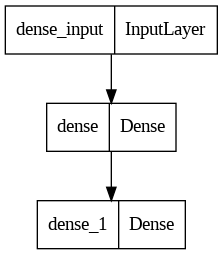

In [54]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_1)

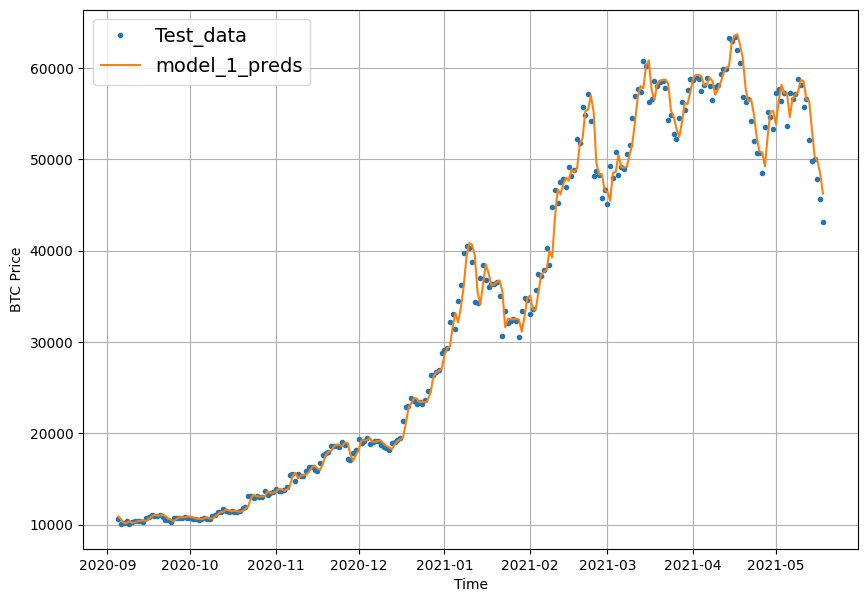

In [55]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

What's wrong with these predictions?

As mentioned before, they're on the test dataset. So they're not actual forecasts.

With our current model setup, how do you think we'd make forecasts for the future?

Have a think about it for now, we'll cover this later on.

# Model 2:Dense (window=30, horizon=1)
A naïve model is currently beating our handcrafted deep learning model.

We can't let this happen.

Let's continue our modelling experiments.

We'll keep the previous model architecture but use a window size of 30.

In other words, we'll use the previous 30 days of Bitcoin prices to try and predict the next day price.

In [56]:
HORIZON =1 # predict one steps at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [57]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [58]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

now data is prepared so we can apply the model on it
so lets create the another model from above data

so now create the model_2, a model with the same archetecture as model_1 as well as the same training routine

In [59]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Once again, training goes nice and fast.

Let's evaluate our model's performance.

In [60]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 957us/step - loss: 902.0508


902.0508422851562

how about we try loading in the best performing model_2 thats we saved by the ModelCkeckpoints callbacks

In [61]:
# Load the best Performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 622.2855


622.2855224609375

let's make some predictions with model_2 and then evaluate them just as we did before.

In [62]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
model_2_preds

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8793.451 ,  8757.809 ,  8823.328 ,  8522.044 ,  8379.277 ,
        8329.15  ,  8218.242 ,  8213.2705,  8059.722 ,  7747.4185,
        7315.748 ,  7276.6606,  7090.314 ,  7111.9976,  7136.021 ,
        7488.6353,  7349.7983,  7588.2246,  7596.4917,  7439.7803,
        7280.3936,  7296.827 ,  7211.406 ,  7294.823 ,  7384.2593,
        7528.729 ,  7492.748 ,  7322.3325,  7281.5376,  7164.53  ,
        7151.704 ,  7203.666 ,  7128.5405,  7175.239 ,  6915.6167,
        6675.444 ,  7111.064 ,  7114.4614,  7094.3394,  7125.7383,
        7308.1504,  7174.5615,  7220.49  ,  7262.8447,  7197.9023,
        7127.523 ,  7238.5103,  7367.1216,  7285.1416,  7242.278 ,
        7185.16  ,  7003.05  ,  7108.905 ,  7305.7534,  7410.8545,
        7515.3335,  8025.905 ,  8098.847 ,  7885.493 ,  8040.2393,
        8072.4126,  8210.573 ,  8087.94  ,  8636.277 ,  8892.442 ,
        8785.412 ,  8915.413 ,  9069.722 ,  8772.209 ,  8625.73  ,
        8783.0

In [63]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 622.2854,
 'mse': 1372279.4,
 'rmse': 1171.4432,
 'mape': 2.7918746,
 'mase': 1.0877609}

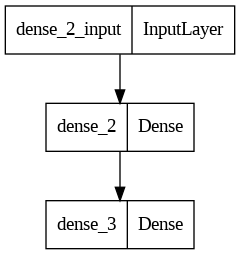

In [64]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_2)

its looks like model_2 performance worse than the naive model as well as model_1!
Does this mean a smaller window size is better in our case

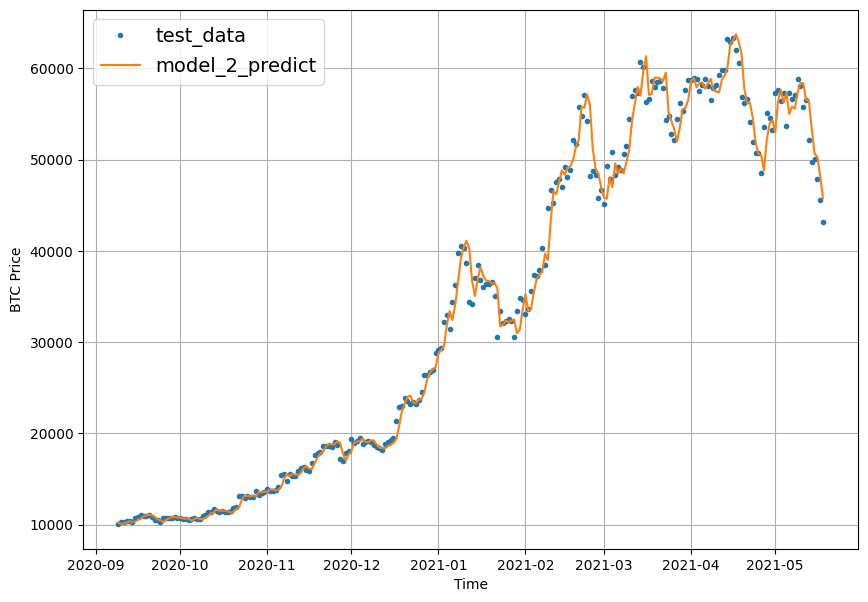

In [65]:
offset = 300
plt.figure(figsize=(10,7))
# Account for the test_windows offset
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds, start=offset, format="-",label="model_2_predict")

# Model 3: Dense (window=30, horizon=7)
we will try to predict the 7 days ahed given the previous 30 days
Fitst, we will update HORIZON and WINDOW_SIZE variable and create windowed data.

In [66]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

and we will split data dataset windows into training and test sets.

In [67]:
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(windows=full_windows, labels=full_labels,test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

now the above data is fully ready for the another models.

In [68]:
tf.random.set_seed(42)

# Create the model (same as model except with deffremt data input size)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
    ],name="model_3_dense")

 # Compile the model
model_3.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [69]:
# how did out model a larger window size horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1330.8129


1330.8128662109375

To compare apples to apples (best performing model to best performing model), we've got to load in the best version of `model_3`.

In [70]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1243.1838


1243.183837890625

In this case, the error will be higher because we're predicting 7 steps at a time.

This makes sense though because the further you try and predict, the larger your error will be (think of trying to predict the weather 7 days in advance).

Let's make predictions with our model using the `make_preds()` function and evaluate them using the `evaluate_preds()` function.

In [71]:
# the predoction are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 947us/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9397.277 , 9038.255 , 9282.6045, 9537.716 , 9402.372 , 9531.539 ,
        9275.032 ],
       [9118.726 , 8903.187 , 8972.681 , 9177.508 , 9154.292 , 9312.784 ,
        9126.098 ],
       [8759.578 , 8807.766 , 8923.884 , 9040.424 , 9212.825 , 9101.853 ,
        9149.587 ],
       [8856.775 , 8939.957 , 9253.027 , 9216.002 , 9447.302 , 9214.85  ,
        9361.552 ],
       [8816.056 , 8876.323 , 9100.128 , 9099.982 , 9394.34  , 9185.294 ,
        9218.958 ]], dtype=float32)>

In [72]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 558.89874 ,  408.92633 ,  387.01773 ,  557.6147  ,  544.37805 ,
         517.8095  ,  580.1825  ,  583.785   ,  585.59174 ,  621.8835  ,
         759.69006 ,  769.91223 ,  838.4712  ,  895.2553  ,  617.5963  ,
         163.29031 ,  206.59215 ,  298.28607 ,  350.44028 ,  307.82672 ,
         192.12424 ,  205.1891  ,  288.0662  ,  334.16064 ,  165.00998 ,
          81.336426,  109.53446 ,  158.44572 ,  214.8466  ,  234.30566 ,
         230.99023 ,  379.68393 ,  354.76596 ,  331.55112 ,  300.55692 ,
         287.3969  ,  337.77936 ,  261.94434 ,  252.81418 ,  245.0648  ,
         418.62772 ,  126.955215,  121.76925 ,  135.61035 ,  145.45961 ,
         125.87032 ,   82.561035,  100.912315,  124.7922  ,  119.348145,
         190.12703 ,  140.61418 ,  235.86076 ,  152.6363  ,  214.4098  ,
         359.35107 ,  499.77066 ,  502.2733  ,  477.2173  ,  546.16296 ,
         375.69434 ,  148.58517 ,  277.1806  ,  334.44693 ,  419.86148 ,
         454.73215 ,  460.1111  ,  480.56424

## Make our evaluation function work for larger horizons

You'll notice the outputs for `model_3_results` are multi-dimensional.

This is because the predictions are getting evaluated across the `HORIZON` timesteps (7 predictions at a time).

To fix this, let's adjust our `evaluate_preds()` function to work with multiple shapes of data.

In [73]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Now we've updated `evaluate_preds()` to work with multiple shapes, how does it look?

In [74]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1243.1837,
 'mse': 5383066.0,
 'rmse': 1431.4297,
 'mape': 5.6509843,
 'mase': 2.2121758}

Time to visualize.

If our prediction evaluation metrics were mutli-dimensional, how do you think the predictions will look like if we plot them?

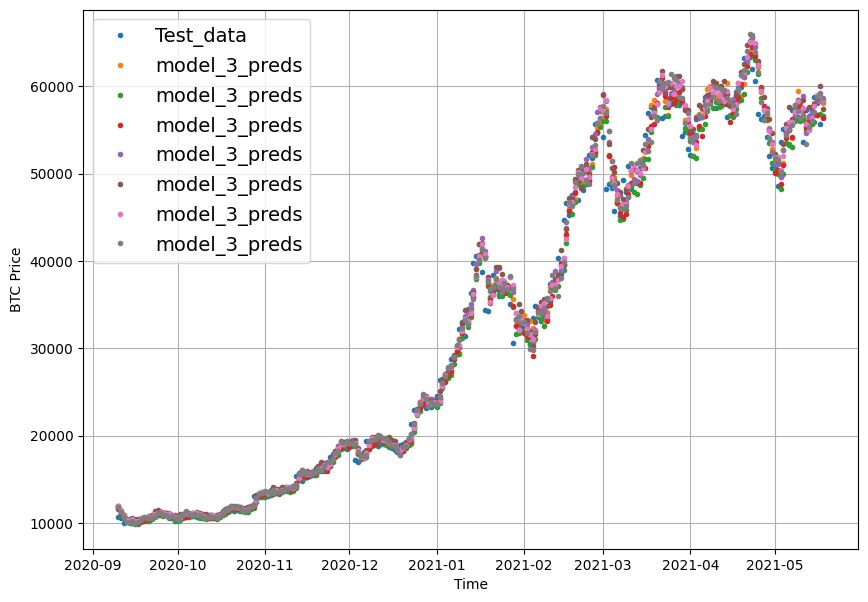

In [75]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

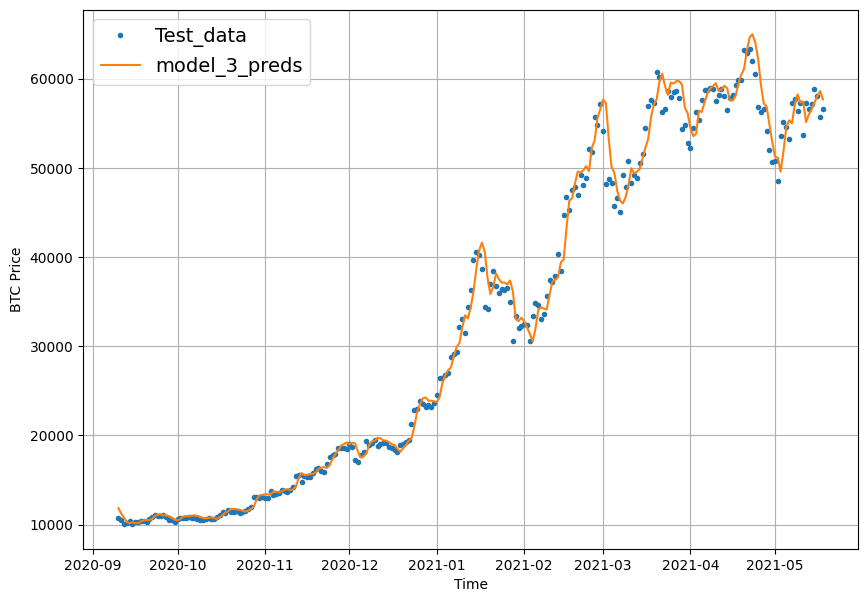

In [76]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

In [77]:
# model_3 = tf.keras.Sequential([
#     layers.Dense(128,activation="relu"),
#     layers.Dense(1)
# ])
# model_3.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())
# model_3.fit(train_windows,
#             train_labels,
#             epochs=10,
#             validation_data=(test_windows,test_labels))

## Which of our models is performing best so far?

So far, we've trained 3 models which use the same architecture but use different data inputs.

Let's compare them with the naïve model to see which model is performing the best so far.

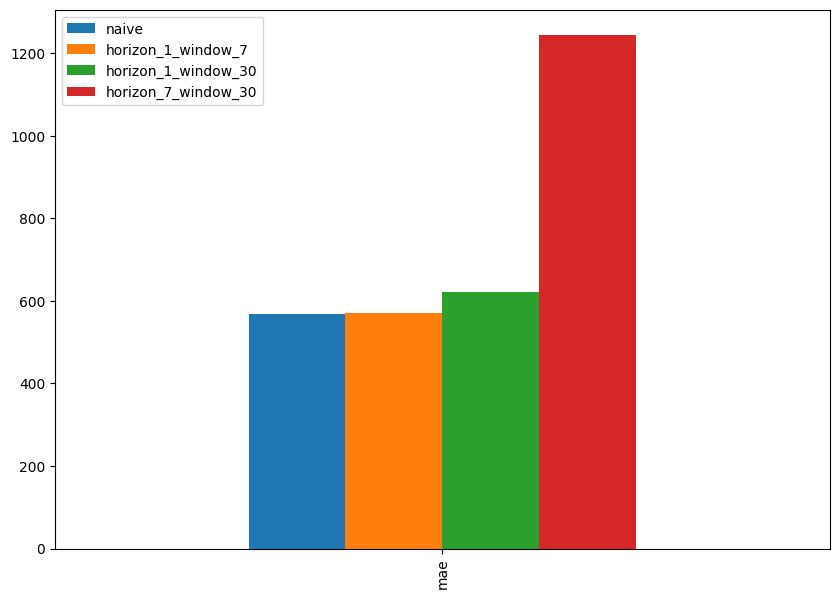

In [78]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [79]:
 model_3_results["mae"]

1243.1837

# model 4: Conv1D
Onto the next modelling experiment!

This time, we'll be using a Conv1D model. Because as we saw in the sequence modelling notebook, Conv1D models can be used for seq2seq (sequence to sequence) problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

In [80]:
HOROZON = 1
WINDOW_SIZE = 7

In [81]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2774, 2774)

In [82]:
# Create the train/test set
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2219, 555, 2219, 555)

In [83]:
# check the shape of the first sample of the train_windows
train_windows[0].shape

(7,)

To fix this, we could adjust the shape of all of our `train_windows` or we could use a [`tf.keras.layers.Lamdba`](https://keras.io/api/layers/core_layers/lambda/) (called a Lambda layer) to do this for us in our model.

The Lambda layer wraps a function into a layer which can be used with a model.

Let's try it out.

In [84]:
# Before the pass our data in model means in conv1D , first we need to reshape it in order to meke sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}") # windows size
print(f"expand shape: {expand_dims_layer(x).shape}") # (WINDOWS_SIZE, input_dims)
print(f"origionel values with expanded shape\n {expand_dims_layer(x)}")

Original shape: (7,)
expand shape: (7, 1)
origionel values with expanded shape
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


we got a Lambda layer, let's build, compile, fit and evaluate a Conv1D model on our data.

In [85]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [86]:
# import matplotlib.pyplot as plt

# # Fit the model and collect the history
# history = model_4.fit(train_windows,
#                       train_labels,
#                       batch_size=128,
#                       epochs=100,
#                       verbose=0,
#                       validation_data=(test_windows, test_labels),
#                       callbacks=[create_model_checkpoint(model_name=model_4.name)])

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [87]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 7)              903       
                                                                 
Total params: 5,511
Trainable params: 5,511
Non-trainable params: 0
_________________________________________________________________


In [88]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 15377.0039


15377.00390625

In [89]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 973us/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1982.4581, 2514.8696, 2339.8293, 2050.4473, 1939.3656, 1782.0997,
        2571.5105],
       [1987.1996, 2523.0977, 2332.5842, 2049.6748, 1949.589 , 1792.8173,
        2609.6543],
       [2025.1012, 2518.4177, 2327.5652, 2040.8733, 1892.7533, 1790.4105,
        2587.4844],
       [2020.1642, 2529.289 , 2339.293 , 2043.213 , 1905.8461, 1791.1749,
        2595.5278],
       [2023.3256, 2525.4304, 2333.6482, 2042.4604, 1914.7294, 1796.6324,
        2581.3997],
       [2002.6066, 2519.4702, 2331.666 , 2030.3038, 1894.1555, 1802.1537,
        2602.0366],
       [1934.1031, 2516.278 , 2344.6846, 1989.3264, 1914.6459, 1797.9114,
        2534.3489],
       [1914.33  , 2508.7668, 2358.5881, 1985.043 , 1887.9117, 1787.0111,
        2498.8892],
       [1916.2184, 2448.1863, 2298.5933, 1994.8694, 1863.4092, 1733.7738,
        2486.4033],
       [1869.3948, 2430.1516, 2254.1982, 1981.0028, 1941.3009, 1727.4457,
        2510.579 ]], dtype=floa

In [90]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 15377.002,
 'mse': 419738720.0,
 'rmse': 15413.324,
 'mape': 76.94748,
 'mase': 27.49788}

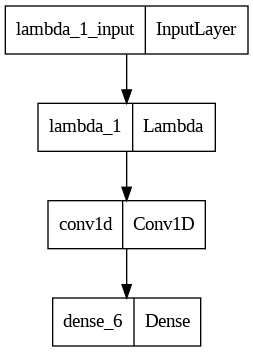

In [91]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_4)

# **Model 5:RNN (LSTM)**




*



1. What is LSTM?

LSTM stands for long short-term memory. It is a type of recurrent neural network (RNN) that is specifically designed to handle long-term dependencies in sequential data. This makes it well-suited for tasks such as speech recognition, machine translation, and text generation.

2. How does LSTM work?

LSTM has a special architecture that allows it to control the flow of information through the network. This architecture includes three gates: an input gate, a forget gate, and an output gate. The input gate determines how much new information is added to the network, the forget gate determines how much information is removed from the network, and the output gate determines how much information is output from the network.

What are the uses of LSTM?

LSTM is used in a wide variety of tasks, including:

* Speech recognition
* Machine translation
* Text generation
* Natural language processing
* Time series forecasting
* Financial trading
* Benefits of LSTM

3. LSTM has several advantages over other RNNs, including:

* It can learn long-term dependencies.
* It is relatively insensitive to noise.
* It can be used to model a wide variety of sequential data.

4. Conclusion

LSTM is a powerful tool for processing sequential data. It is used in a wide variety of tasks, and it is constantly being improved. As LSTM continues to develop, it is likely to become even more powerful and versatile.

Here are some additional uses of LSTM:

Fraud detection
Medical diagnosis
Game playing
Robotics

In [92]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [93]:
# load in best version of model 5 and evaluate on the test set
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1196.8347


1196.834716796875

In [94]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[9300.4   , 9295.921 , 9246.197 , 9315.817 , 9333.594 , 9294.512 ,
        9311.496 ],
       [9412.27  , 9394.638 , 9367.556 , 9425.184 , 9442.59  , 9410.68  ,
        9427.527 ],
       [9450.846 , 9423.2295, 9408.335 , 9471.478 , 9478.312 , 9439.698 ,
        9460.389 ],
       [9458.954 , 9441.962 , 9402.161 , 9478.085 , 9490.465 , 9441.946 ,
        9448.098 ],
       [9379.581 , 9365.582 , 9343.054 , 9408.316 , 9418.941 , 9378.744 ,
        9402.503 ],
       [9043.296 , 9053.657 , 9016.929 , 9103.202 , 9115.964 , 9066.809 ,
        9105.922 ],
       [8896.699 , 8935.614 , 8871.002 , 8963.195 , 8982.117 , 8932.692 ,
        8931.664 ],
       [9037.789 , 9060.209 , 8996.725 , 9083.812 , 9095.59  , 9052.867 ,
        9027.238 ],
       [8859.615 , 8875.226 , 8796.931 , 8888.696 , 8905.323 , 8855.766 ,
        8869.357 ],
       [8812.486 , 8828.664 , 8772.343 , 8833.117 , 8863.815 , 8833.898 ,
        8857.922 ]], dtype=floa

In [95]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 1196.8347,
 'mse': 5038382.5,
 'rmse': 1376.1366,
 'mape': 5.427415,
 'mase': 2.1402361}

In [96]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [97]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [98]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [99]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


We officially added another variable to our time series data.

Let's see what it looks like.

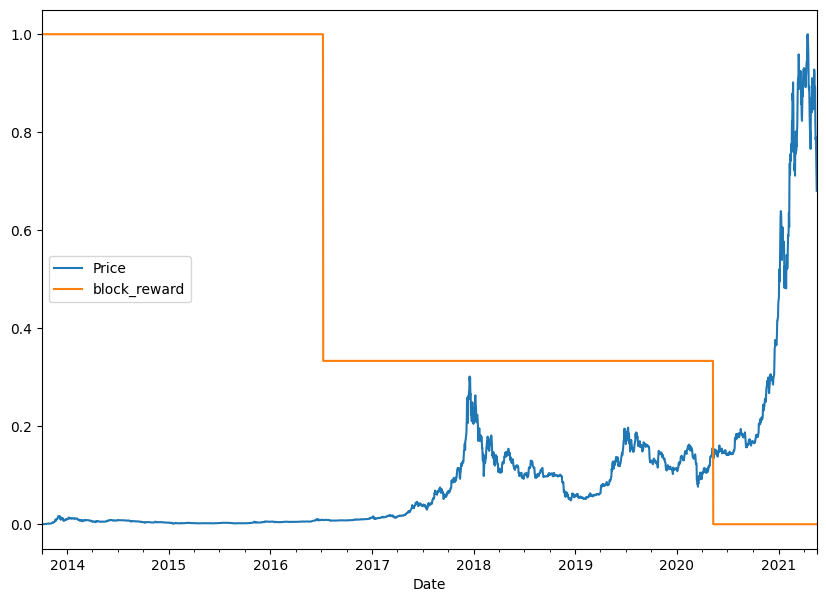

In [100]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

When we scale the block reward and the Bitcoin price, we can see the price goes up as the block reward goes down, perhaps this information will be helpful to our model's performance.

In [101]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 7)                 903       
                                                                 
Total params: 70,535
Trainable params: 70,535
Non-trainable params: 0
_________________________________________________________________


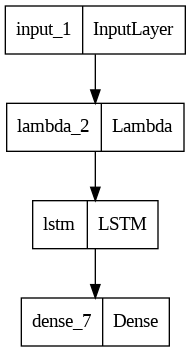

In [102]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_5)

## Making a windowed dataset with pandas

Previously, we used some custom made functions to window our **univariate** time series.

However, since we've just added another variable to our dataset, these functions won't work.

Not to worry though. Since our data is in a pandas DataFrame, we can leverage the [`pandas.DataFrame.shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) method to create a windowed **multivariate** time series.

The `shift()` method offsets an index by a specified number of periods.


In [103]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [104]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Now that we've got a windowed dataset, let's separate features (`X`) from labels (`y`).

Remember in our windowed dataset, we're trying to use the previous `WINDOW_SIZE` steps to predict `HORIZON` steps.

```
Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

We'll also remove the `NaN` values using pandas [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method, this equivalent to starting our windowing function at `sample 0 (the first sample) + WINDOW_SIZE`.

In [105]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [106]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

What a good looking dataset, let's split it into train and test sets using an 80/20 split just as we've done before.

In [107]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Training and test multivariate time series datasets made! Time to build a model.

# **Model 6: Dense (multivariate time series)**
To keep things simple, let's the `model_1` architecture and use it to train and make predictions on our multivariate time series data.

By replicating the `model_1` architecture we'll be able to see whether or not adding the block reward feature improves or detracts from model performance.

multivariate time series : A multivariate time series refers to a sequence of data points collected over time, where each data point consists of multiple variables or features.

In [108]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [109]:
tf.random.set_seed(42)

# make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_6_dense_multiriate")

# Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_6.fit(X_train,y_train,
            epochs=100,
            verbose=0, # only print 1 line per epochs
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [110]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 949us/step - loss: 574.4891


574.4891357421875

In [111]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 974us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8868.6455, 8769.24  , 9038.6   , 8785.552 , 8704.615 , 8765.344 ,
       8675.377 , 8507.002 , 8473.212 , 8519.9375], dtype=float32)>

In [112]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 574.4892,
 'mse': 1185278.4,
 'rmse': 1088.705,
 'mape': 2.5681286,
 'mase': 1.0092185}

In [113]:
model_1_results

{'mae': 571.06696,
 'mse': 1190410.8,
 'rmse': 1091.0594,
 'mape': 2.565252,
 'mase': 1.0032065}

It looks like the adding in the block reward may have helped our model slightly.

## Model 7: N-BEATS algorithm

In [114]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Setting up the `NBeatsBlock` custom layer we see:
* The class inherits from `tf.keras.layers.Layer` (this gives it all of the methods assosciated with `tf.keras.layers.Layer`)
* The constructor (`def __init__(...)`) takes all of the layer hyperparameters as well as the `**kwargs` argument
  * The `**kwargs` argument takes care of all of the hyperparameters which aren't mentioned in the constructor such as, `input_shape`, `trainable` and `name`
* In the constructor, the block architecture layers are created:
  * The hidden layers are created as a stack of fully connected with `n_nuerons` hidden units layers with ReLU activation
  * The theta layer uses `theta_size` hidden units as well as linear activation
* The `call()` method is what is run when the layer is called:
  * It first passes the inputs (the historical Bitcoin data) through each of the hidden layers (a stack of fully connected layers with ReLU activation)
  * After the inputs have been through each of the fully connected layers, they get passed through the theta layer where the backcast (backwards predictions, shape: `input_size`) and forecast (forward predictions, shape: `horizon`) are returned

In [115]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [116]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [117]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.17523849  0.06685846 -0.91139627  0.5507202  -1.1086384   0.4890803
  1.1583495 ]
Forecast: 1.2213114500045776


### Preparing data for the N-BEATS algorithm using `tf.data`

as we got the basic building block for the N-BEATS architecture ready to go.

But before we use it to replicate the entire N-BEATS generic architecture, let's create some data.

This time, because we're going to be using a larger model architecture, to ensure our model training runs as fast as possible, we'll setup our datasets using the `tf.data` API.

And because the N-BEATS algorithm is focused on univariate time series, we'll start by making training and test windowed datasets of Bitcoin prices (just as we've done above).


In [118]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [119]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [120]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [121]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Train and test sets ready to go!

Now let's convert them into TensorFlow `tf.data.Dataset`'s to ensure they run as fast as possible whilst training.

We'll do this by:
1. Turning the arrays in tensor Datasets using [`tf.data.Dataset.from_tensor_slices()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)
  * Note: `from_tensor_slices()` works best when your data fits in memory, for extremely large datasets, you'll want to look into using the [`TFRecord` format](https://www.tensorflow.org/tutorials/load_data/tfrecord)
2. Combine the labels and features tensors into a Dataset using [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)
3. Batch and prefetch the Datasets using [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) and [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch)
  * Batching and prefetching ensures the loading time from CPU (preparing data) to GPU (computing on data) is as small as possible


In [122]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [123]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Beautiful! Hyperparameters ready, now before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS **double residual stacking** (section 3.2 of the [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)) possible:
* [`tf.keras.layers.subtract(inputs)`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/subtract) - subtracts list of input tensors from each other
* [`tf.keras.layers.add(inputs)`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add) - adds list of input tensors to each other

Let's try them out.

In [124]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


We'll do so by going through the following:

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional) for this)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using [`tf.keras.Model()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf))
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:

In [125]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 201: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 301: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 42min 56s, sys: 45.3 s, total: 43min 42s
Wall time: 33min 3s


In [126]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 329ms/step - loss: 571.6225 - mae: 571.6225 - mse: 1147242.7500


[571.6224975585938, 571.6224975585938, 1147242.75]

In [127]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8852.717, 8849.172, 9017.621, 8746.785, 8760.756, 8766.639,
       8582.137, 8550.981, 8503.043, 8503.981], dtype=float32)>

In [128]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 571.6225,
 'mse': 1147242.8,
 'rmse': 1071.0942,
 'mape': 2.6376064,
 'mase': 1.0041825}

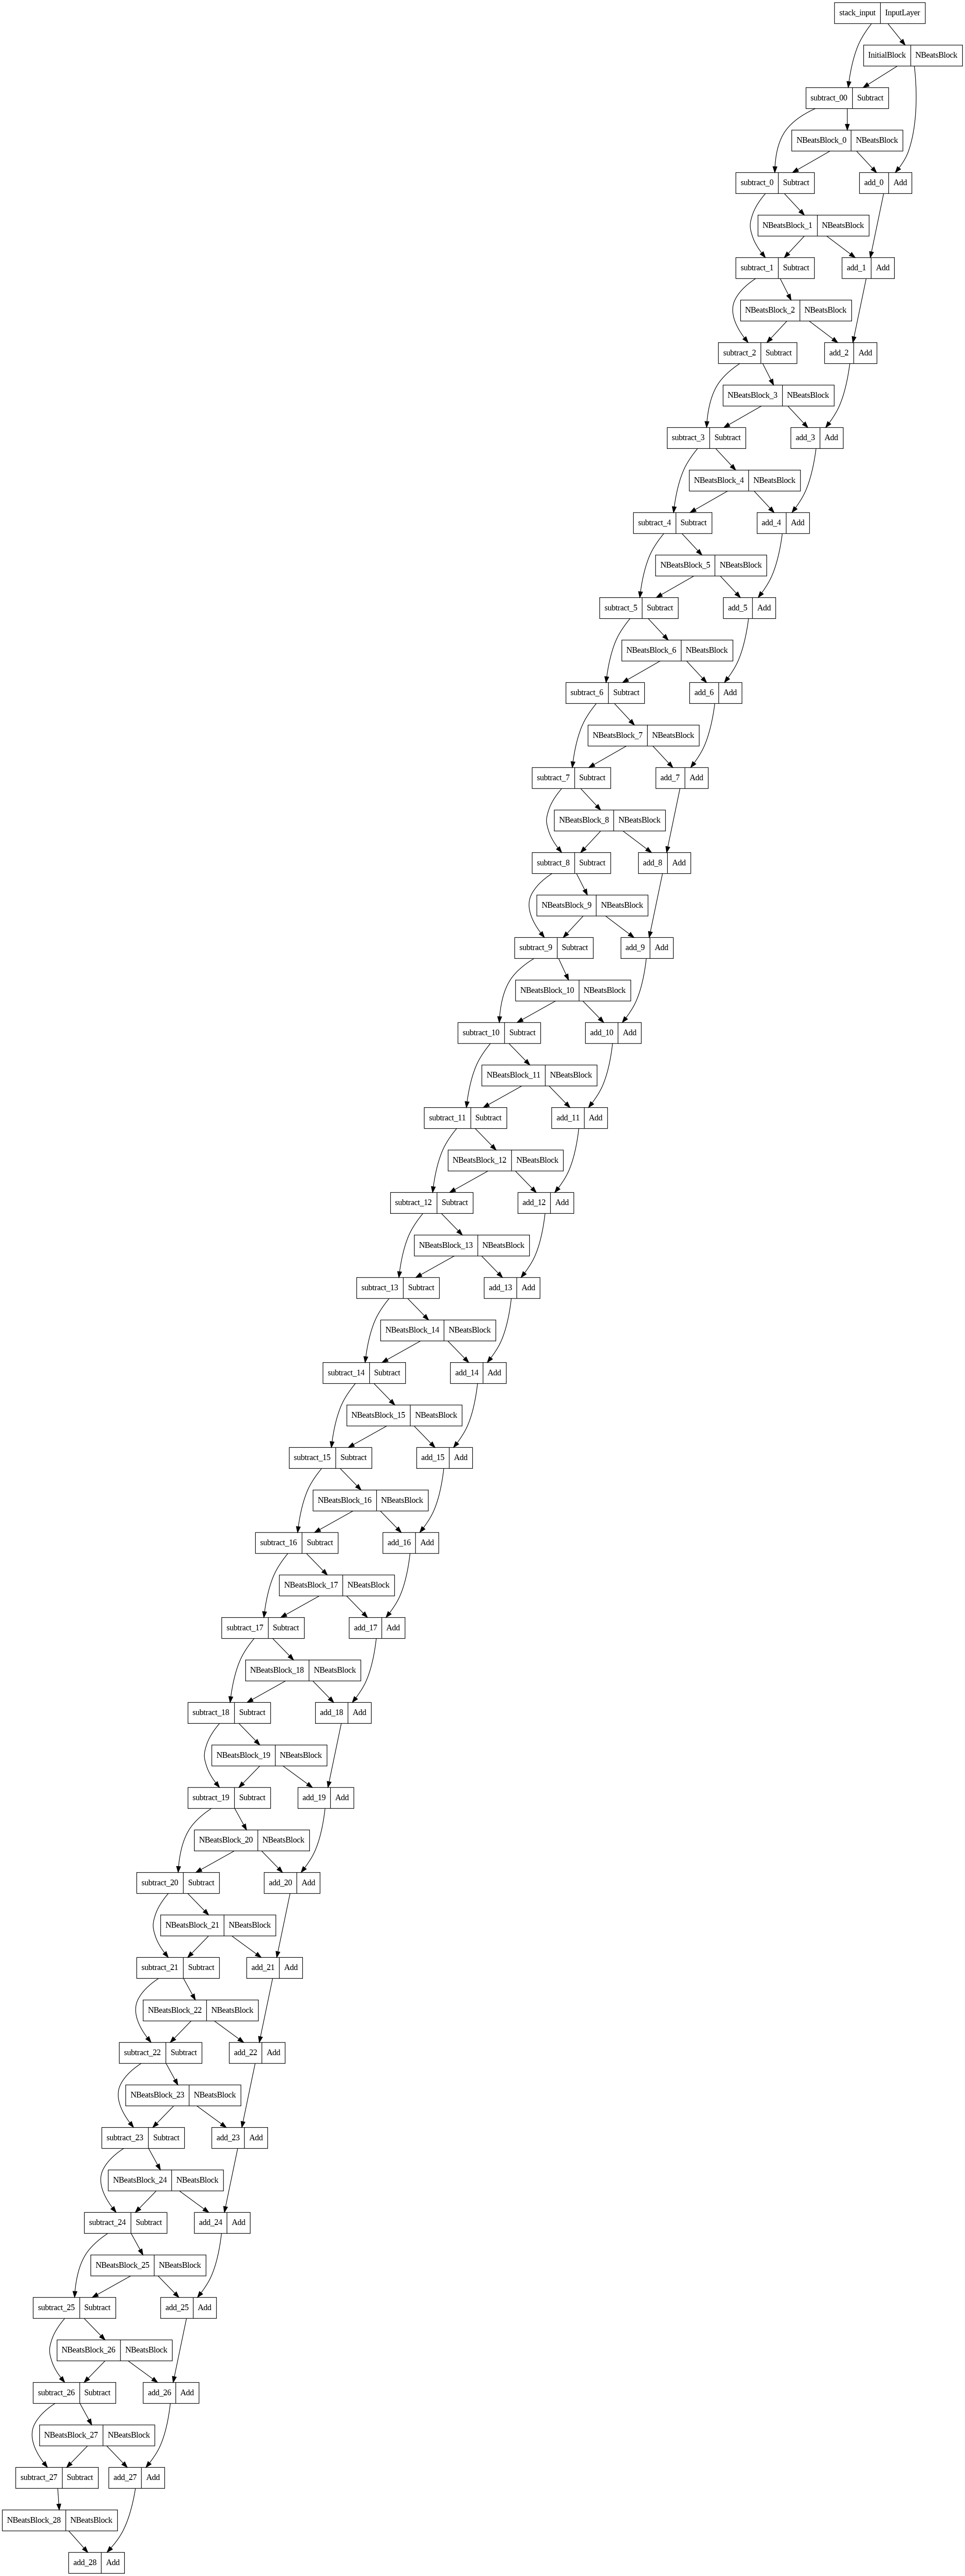

In [129]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [130]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

## Model 8: Creating an ensemble (stacking different models together)

After all that effort, the N-BEATS algorithm's performance was underwhelming.

But again, this is part of the parcel of machine learning. Not everything will work.

That's when we refer back to the motto: experiment, experiment, experiment.

Our next experiment is creating an [**ensemble** of models](https://en.wikipedia.org/wiki/Ensemble_learning).

An **ensemble** involves training and combining multiple different models on the same problem. Ensemble models are often the types of models you'll see winning data science competitions on websites like Kaggle.

In [131]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [132]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 294: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 412: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 512: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 509: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 181: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 281: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 403: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 503: ReduceLROnPl

Look at all of those models!

How about we now write a function to use the list of trained ensemble models to make predictions and then return a list of predictions (one set of predictions per model)?

In [133]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [134]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8766.388,  8780.643,  9059.861, ..., 50029.92 , 48789.438,
        46927.953],
       [ 8705.258,  8647.954,  8978.805, ..., 49387.723, 48357.805,
        46407.78 ],
       [ 8843.013,  8782.84 ,  9041.086, ..., 49736.4  , 48258.402,
        45610.96 ],
       ...,
       [ 8769.85 ,  8744.147,  9011.675, ..., 50449.08 , 48548.29 ,
        46191.19 ],
       [ 8792.174,  8778.281,  9029.858, ..., 50114.418, 48335.34 ,
        45898.656],
       [ 8830.918,  8848.882,  9073.542, ..., 50031.816, 47848.004,
        45697.574]], dtype=float32)>

Now we've got a set of ensemble predictions, we can evaluate them against the ground truth values.

However, since we've trained 15 models, there's going to be 15 sets of predictions. Rather than comparing every set of predictions to the ground truth, let's take the median (you could also take the mean too but [the median is usually more robust than the mean](https://www.johndcook.com/blog/2009/03/06/student-t-distribution-mean-median/)).

In [135]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 570.89026,
 'mse': 1146562.0,
 'rmse': 1070.7764,
 'mape': 2.5820074,
 'mase': 1.0028961}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

Right now all of our model's (prior to the ensemble model) are predicting single points.

Meaning, given a set of `WINDOW_SIZE=7` values, the model will predict `HORIZION=1`.

But what might be more helpful than a single value?

Perhaps a range of values?

For example, if a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD? (note: "$" has been omitted from the previous sentence due to formatting issues)

Knowing the range of values a model is predicting may help you make better decisions for your forecasts.

You'd know that although the model is predicting 50,000USD (a **point prediction**, or single value in time), the value could actually be within the range 48,000USD to 52,000USD (of course, the value could also be *outside* of this range as well, but we'll get to that later).

These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

In [136]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

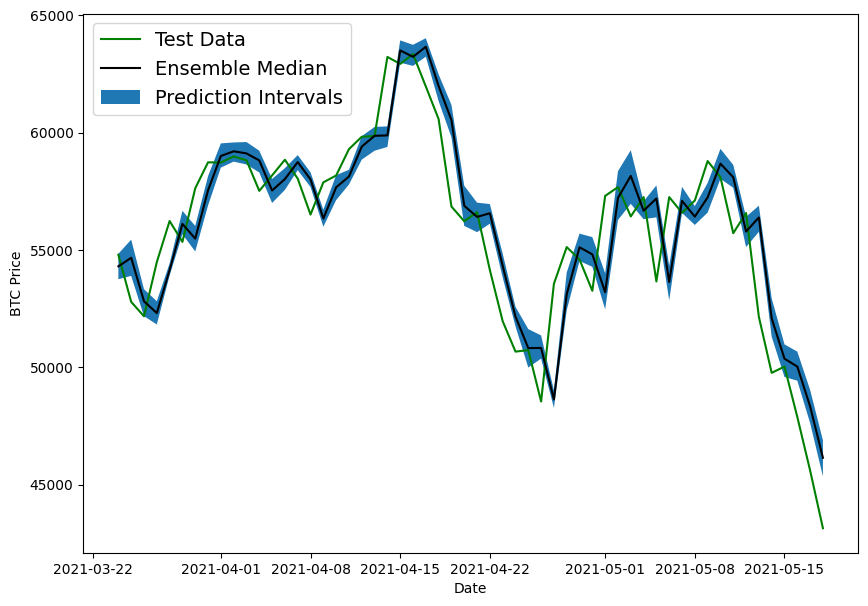

In [137]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

we just plotted:
* The test data (the ground truth Bitcoin prices)
* The median of the ensemble predictions
* The 95% prediction intervals (assuming the data is Gaussian/normal, the model is saying that 95% of the time, predicted value should fall between this range)


## Aside: two types of uncertainty (coconut and subway)

Inheritly, you know you cannot predict the future.

That doesn't mean trying to isn't valuable.

For many things, future predictions are helpful. Such as knowing the bus you're trying to catch to the library leaves at 10:08am. The time 10:08am is a **point prediction**, if the bus left at a random time every day, how helpful would it be?

Just like saying the price of Bitcoin tomorrow will be 50,000USD is a point prediction.

However, as we've discussed knowing a **prediction interval** or **uncertainty estimate** can be as helpful or even more helpful than a point prediction itself.

Uncertainty estimates seek out to qualitatively and quantitatively answer the questions:
* What can my model know? (with perfect data, what's possible to learn?)
* What doesn't my model know? (what can a model never predict?)

There are two types of uncertainty in machine learning you should be aware of:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.
  * Let's say your train is scheduled to arrive at 10:08am but very rarely does it arrive at *exactly* 10:08am. You know it's usually a minute or two either side and perhaps up to 10-minutes late if traffic is bad. Even with all the data you could imagine, this level of uncertainty is still going to be present (much of it being noise).
  * When we measured prediction intervals, we were measuring a form of subway uncertainty for Bitcoin price predictions (a little either side of the point prediction).

* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.
  * The analogy for coconut uncertainty involves whether or not you'd get hit on the head by a coconut when going to a beach.
    * If you were at a beach with coconuts trees, as you could imagine, this would be very hard to calculate. How often does a coconut fall of a tree? Where are you standing?
    * But you could reduce this uncertainty to zero by going to a beach without coconuts (collect more data about your situation).
  * Model uncertainty can be reduced by collecting more data samples/building a model to capture different parameters about the data you're modelling.

The lines between these are blurred (one type of uncertainty can change forms into the other) and they can be confusing at first but are important to keep in mind for any kind of time series prediction.

If you ignore the uncertanties, are you really going to get a reliable prediction?

Perhaps another example might help.

### Uncertainty in dating

Let's say you're going on a First Date Feedback Radio Show to help improve your dating skills.

Where you go on a blind first date with a girl (feel free to replace girl with your own preference) and the radio hosts record the date and then playback snippets of where you could've improved.

And now let's add a twist.

Last week your friend went on the same show. They told you about the girl they met and how the conversation went.

Because you're now a machine learning engineer, you decide to build a machine learning model to help you with first date conversations.

## Model 9: Train a model on the full historical data to make predictions into future

What would a forecasting model be worth if we didn't use it to predict into the future?

It's time we created a model which is able to make future predictions on the price of Bitcoin.

To make predictions into the future, we'll train a model on the full dataset and then get to make predictions to some future horizon.

Why use the full dataset?

Previously, we split our data into training and test sets to evaluate how our model did on pseudo-future data (the test set).

But since the goal of a forecasting model is to predict values into the actual-future, we won't be using a test set.

In [138]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [139]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

Windows and labels ready! Let's turn them into performance optimized TensorFlow Datasets by:
1. Turning `X_all` and `y_all` into tensor Datasets using [`tf.data.Dataset.from_tensor_slices()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)
2. Combining the features and labels into a Dataset tuple using [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)
3. Batch and prefetch the data using [`tf.data.Dataset.batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) and [`tf.data.Dataset.prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) respectively

In [140]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

And now let's create a model similar to `model_1` except with an extra layer, we'll also fit it to the entire dataset for 100 epochs (feel free to play around with the number of epochs or callbacks here, you've got the skills to now).


In [141]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

### Make predictions on the future

Let's predict the future and get rich!

Well... maybe not.

As you've seen so far, our machine learning models have performed quite poorly at predicting the price of Bitcoin (time series forecasting in open systems is typically a game of luck), often worse than the naive forecast.

That doesn't mean we can't use our models to *try* and predict into the future right?

To do so, let's start by defining a variable `INTO_FUTURE` which decides how many timesteps we'd like to predict into the future.

In [142]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

![flowchart representation prediction loop to make forecasts and then append forecasts to data and make more forecasts continuously until forecast horizon is exhausted](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-loop-for-forecasts.png)
*Example flow chart representing the loop we're about to create for making forecasts. Not pictured: retraining a forecasting model every time a forecast is made & new data is acquired. For example, if you're predicting the price of Bitcoin daily, you'd want to retrain your model every day, since each day you're going to have a new data point to work with.*

Alright, let's create a function which returns `INTO_FUTURE` forecasted values using a trained model.

To do so, we'll build the following steps:
1. Function which takes as input:
  * a list of values (the Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` values from the input values (predictions will start from the last `WINDOW_SIZE` values of the training data)
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first the value and append the latest prediction
  * Eventually future predictions will be made using the model's own previous predictions as input

In [143]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

Time to bring BitPredict 💰📈 to life and make future forecasts of the price of Bitcoin.

In [144]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 50ms/step
Predicting on: 
 [56573.55547 52147.82119 49764.13208 50032.69314 47885.62525 45604.61575
 43144.47129] -> Prediction: 55270.609375

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [52147.82119  49764.13208  50032.69314  47885.62525  45604.61575
 43144.47129  55270.609375] -> Prediction: 51322.0078125

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [49764.13208   50032.69314   47885.62525   45604.61575   43144.47129
 55270.609375  51322.0078125] -> Prediction: 48308.4453125

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [50032.69314   47885.62525   45604.61575   43144.47129   55270.609375
 51322.0078125 48308.4453125] -> Prediction: 48502.43359375

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [47885.62525    45604.61575    43144.47129    55270.609375
 51322.0078125  48308.4453125  48502.43359375] -> Prediction: 46863.20703125

1/1 [==============

In [145]:
future_forecast[:10]

[55270.61,
 51322.008,
 48308.445,
 48502.434,
 46863.207,
 45368.84,
 48925.918,
 53732.066,
 49345.426,
 47326.12]

# **Plot future forecasts**
This is so exciting! Forecasts made!

But right now, they're just numbers on a page.

Let's bring them to life by adhering to the data explorer's motto: visualize, visualize, visualize!

In [146]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

The start date of our forecasted dates will be the last date of our dataset.

In [147]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [148]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

Look at that! We've now got a list of dates we can use to visualize our future Bitcoin predictions.

But to make sure the lines of the plot connect (try not running the cell below and then plotting the data to see what I mean), let's insert the last timestep and Bitcoin price of our training data to the next_time_steps and future_forecast arrays.

In [149]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55270.61 , 51322.008, 48308.445, 48502.434, 46863.207,
        45368.84 , 48925.918, 53732.066, 49345.426, 47326.12 , 47650.38 ,
        46674.63 , 47514.31 , 51164.58 ], dtype=float32))

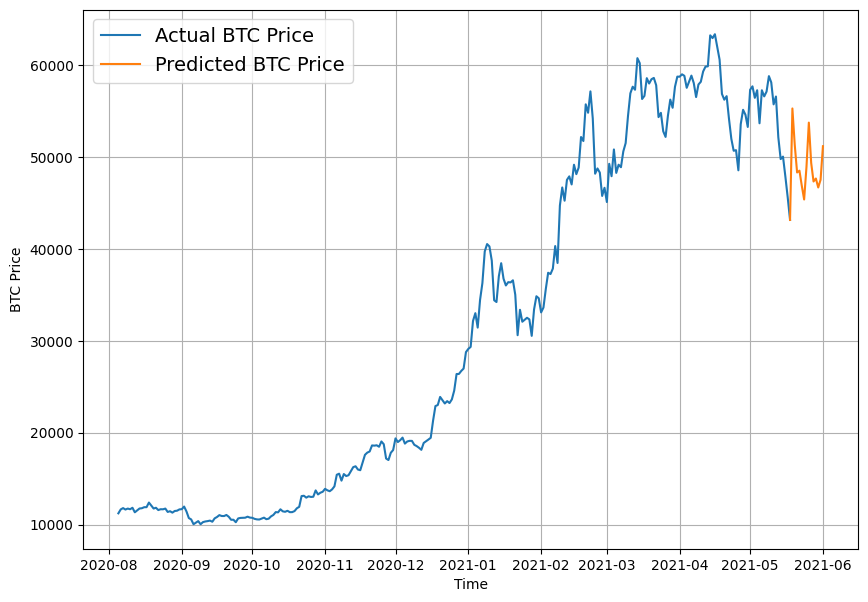

In [150]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

It looks like our predictions are starting to form a bit of a cyclic pattern (up and down in the same way).

## Model 10: Why forecasting is BS (the turkey problem 🦃)

When creating any kind of forecast, you must keep the **turkey problem** in mind.

The **turkey problem** is an analogy for when your observational data (your historical data) fails to capture a future event which is catostrophic and could lead you to ruin.

The story goes, a turkey lives a good life for 1000 days, being fed every day and taken care of by its owners until the evening before Thanksgiving.

Based on the turkey's observational data, it has no reason to believe things shouldn't keep going the way they are.

In other words, how could a turkey possibly predict that on day 1001, after 1000 consectutive good days, it was about to have a far from ideal day.

In [151]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [152]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.20968,
 58102.19143,
 55715.54665,
 56573.55547,
 52147.82119,
 49764.13208,
 50032.69314,
 47885.62525,
 45604.61575,
 431.4447129]

Notice the last value is 100x lower than what it actually was (remember, this is not a real data point, its only to illustrate the effects of the turkey problem).

In [153]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

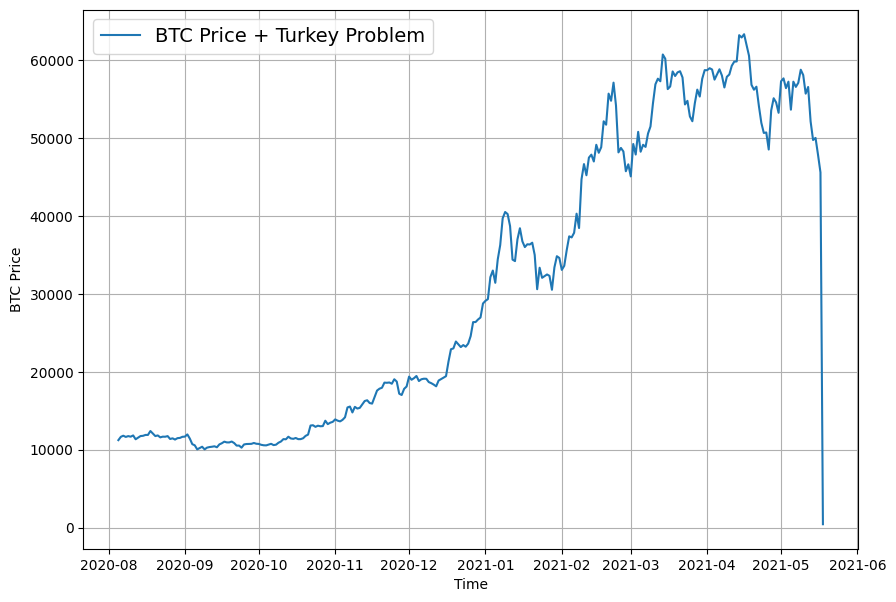

In [154]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

we changed is a single data point out of our entire dataset.

Before we build a model, let's create some windowed datasets with our turkey data.

In [155]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

### Building a turkey model (model to predict on turkey data)

With our updated data, we only changed 1 value.

Let's see how it effects a model.

To keep things comparable to previous models, we'll create a `turkey_model` which is a clone of `model_1` (same architecture, but different data).

That way, when we evaluate the `turkey_model` we can compare its results to `model_1_results` and see how much a single data point can influence a model's performance.


In [156]:
# Clone model_1 architecture for turkey model and fit the turket moidel on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [157]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 644.2440


644.2439575195312

In [158]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 639.1772


639.1771850585938

In [159]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 936us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8828.129 , 8777.15  , 9037.597 , 8756.8125, 8739.653 , 8730.561 ,
       8655.98  , 8519.402 , 8448.727 , 8520.041 ], dtype=float32)>

In [160]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17133.895,
 'mse': 614673000.0,
 'rmse': 23720.469,
 'mape': 121.41288,
 'mase': 26.51476}

And with just one value change, our error metrics go through the roof.

To make sure, let's remind ourselves of how `model_1` went on unmodified Bitcoin data (no turkey problem).

In [161]:
model_1_results

{'mae': 571.06696,
 'mse': 1190410.8,
 'rmse': 1091.0594,
 'mape': 2.565252,
 'mase': 1.0032065}

By changing just one value, the `turkey_model` MAE increases almost 30x over `model_1`.

Finally, we'll visualize the turkey predictions over the test turkey data.

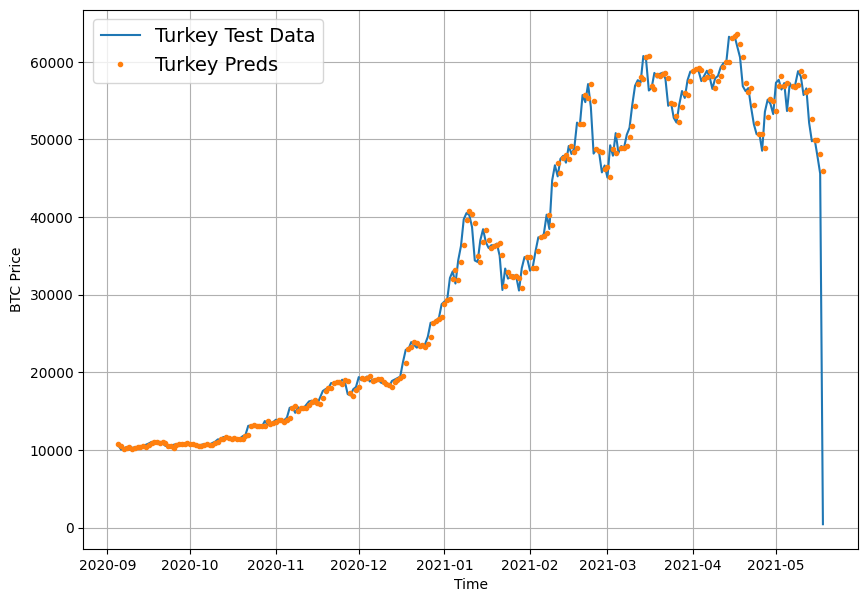

In [162]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

Why does our model fail to capture the turkey problem data point?

Think about it like this, just like a turkey who lives 1000 joyful days, based on observation alone has no reason to believe day 1001 won't be as joyful as the last, a model which has been trained on historical data of Bitcoin which has no single event where the price decreased by 100x in a day, has no reason to predict it will in the future.

## Compare Models
compare the all the model size by size

In [163]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,571.066956,1.190411e+06,1091.059448,2.565252,1.003206
model_2_dense_w30_h1,622.285400,1.372279e+06,1171.443237,2.791875,1.087761
model_3_dense_w30_h7,1243.183716,5.383066e+06,1431.429688,5.650984,2.212176
model_4_CONV1D,15377.001953,4.197387e+08,15413.324219,76.947479,27.497881
model_5_LSTM,1196.834717,5.038382e+06,1376.136597,5.427415,2.140236
model_6_multivariate,574.489197,1.185278e+06,1088.704956,2.568129,1.009218
model_8_NBEATs,571.622498,1.147243e+06,1071.094238,2.637606,1.004182
model_9_ensemble,570.890259,1.146562e+06,1070.776367,2.582007,1.002896
model_10_turkey,17133.894531,6.146730e+08,23720.468750,121.412880,26.514759


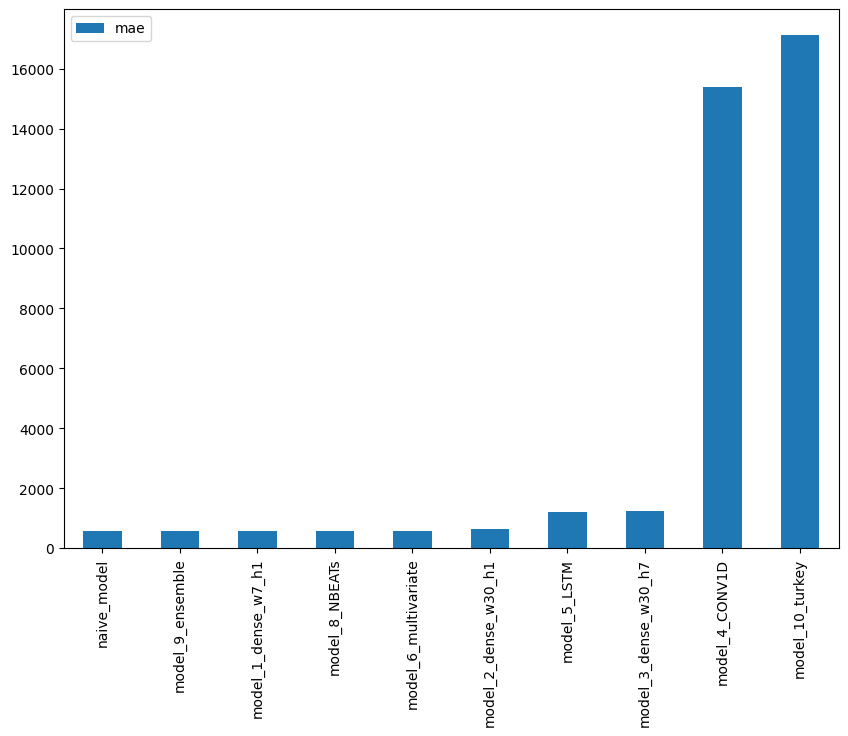

In [164]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

The majority of our deep learning models perform on par or only slightly better than the naive model. And for the turkey model and Model_4, changing a single data point destroys its performance.

In [165]:
print(f"model_1 performance :{naive_results}")
print(f"model_2 performance :{model_2_results}")
print(f"model_3 performance :{model_3_results}")
print(f"model_4 performance :{model_4_results}")
print(f"model_5 performance :{model_5_results}")
print(f"model_6 performance :{model_6_results}")
print(f"model_7 performance :{model_7_results}")
print(f"model_8 performance :{ensemble_results}")
print(f"model_9 performance :{ensemble_results}")
print(f"model_10 performance :{turkey_results}")

model_1 performance :{'mae': 567.9802, 'mse': 1147547.0, 'rmse': 1071.2362, 'mape': 2.516525, 'mase': 0.99957}
model_2 performance :{'mae': 622.2854, 'mse': 1372279.4, 'rmse': 1171.4432, 'mape': 2.7918746, 'mase': 1.0877609}
model_3 performance :{'mae': 1243.1837, 'mse': 5383066.0, 'rmse': 1431.4297, 'mape': 5.6509843, 'mase': 2.2121758}
model_4 performance :{'mae': 15377.002, 'mse': 419738720.0, 'rmse': 15413.324, 'mape': 76.94748, 'mase': 27.49788}
model_5 performance :{'mae': 1196.8347, 'mse': 5038382.5, 'rmse': 1376.1366, 'mape': 5.427415, 'mase': 2.1402361}
model_6 performance :{'mae': 574.4892, 'mse': 1185278.4, 'rmse': 1088.705, 'mape': 2.5681286, 'mase': 1.0092185}
model_7 performance :{'mae': 571.6225, 'mse': 1147242.8, 'rmse': 1071.0942, 'mape': 2.6376064, 'mase': 1.0041825}
model_8 performance :{'mae': 570.89026, 'mse': 1146562.0, 'rmse': 1070.7764, 'mape': 2.5820074, 'mase': 1.0028961}
model_9 performance :{'mae': 570.89026, 'mse': 1146562.0, 'rmse': 1070.7764, 'mape': 2.58

# **Conclusion**
* Model 1 has the lowest MAE (Mean Absolute Error) and RMSE (Root Mean Square Error), indicating it has the best overall accuracy among the models. It also has the lowest MAPE (Mean Absolute Percentage Error) and MASE (Mean Absolute Scaled Error) values, further supporting its superior performance.

* Model 2 has slightly higher MAE, MSE (Mean Squared Error), and RMSE compared to Model 1. Its MAPE and MASE values are also higher, indicating higher percentage and scaled errors. Therefore, Model 2 performs worse than Model 1.

* Model 3 has significantly higher MAE, MSE, RMSE, MAPE, and MASE values compared to Models 1 and 2. This suggests that Model 3 has the poorest performance among the three models.

* Model 4 shows extremely high values for all metrics, indicating a significant deviation between the predicted and actual values. It has the highest errors among all the models, making it the worst performer.

* Model 5 performs better than Model 3 but worse than Models 1 and 2. It has lower MAE, MSE, RMSE, MAPE, and MASE compared to Model 3, but higher values than Models 1 and 2. Thus, it falls in the middle in terms of performance.

* Models 6, 7, and 8 have similar performance metrics with slight variations. They have lower MAE, MSE, RMSE, MAPE, and MASE values compared to Models 3, 4, and 5, but higher than Models 1 and 2. Among these three models, Model 6 has the lowest MAE and RMSE, indicating slightly better accuracy.

* Models 9 and 10 have the same performance metrics, indicating identical performance. They have higher errors compared to Models 1, 2, and 6. Model 10, in particular, has extremely high MAE, MSE, RMSE, MAPE, and MASE values, making it the worst performer along with Model 4.

In conclusion, based on the provided performance metrics, Model 1 is the best performer, followed by Model 2, Model 6, and Model 7 (with similar performance). Models 5, 8, and 9 have slightly lower performance, while Models 3 and 10 perform the poorest. Model 4 has the worst performance among all the models.









# **Best Performing Models from the above 10 models:**
* Model 1 has the lowest MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) among all the models, indicating that it has the best overall accuracy in predicting Bitcoin prices.

* Model 6 has similar performance to Model 1, with slightly higher MAE and RMSE values. However, it still performs well compared to the other models.

* Model 2, Model 3, Model 5, Model 7, and Model 8 have higher MAE and RMSE values compared to Model 1 and Model 6. This suggests that these models have lower accuracy in predicting Bitcoin prices.

* Model 4 and Model 10 exhibit significantly higher MAE and RMSE values, indicating poor performance compared to the other models. They have large errors in their predictions, resulting in less reliable forecasts.

In terms of MAPE (Mean Absolute Percentage Error) and MASE (Mean Absolute Scaled Error), Model 10 has the highest values, indicating a higher percentage of errors and lower accuracy compared to the other models.

Based on these conclusions, it is recommended to use Model 1 or Model 6 for Bitcoin forecasting as they have the best performance among the given models. However, it would be beneficial to assess additional factors such as model complexity, computational requirements, and potential limitations before making a final decision.